In [3]:
import pandas as pd
import numpy as np

In [82]:
aa = pd.read_csv('BANKNIFTYfull.csv')
returns = []
for i in range(len(aa)-1):
    returns.append((abs(aa.Close[i+1]-aa.Close[i])+0.000001)/aa.Close[i])
    
(np.log(np.array(returns))).std()

1.2141817947276703

In [11]:
aa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02 00:00:00+05:30,26364.449219,26371.599609,26060.599609,26230.300781,26230.300781,0
1,2018-07-03 00:00:00+05:30,26210.099609,26316.099609,26142.000000,26204.099609,26204.099609,0
2,2018-07-04 00:00:00+05:30,26249.250000,26480.500000,26132.900391,26433.949219,26433.949219,0
3,2018-07-05 00:00:00+05:30,26481.550781,26598.449219,26415.199219,26503.300781,26503.300781,0
4,2018-07-06 00:00:00+05:30,26427.550781,26609.849609,26410.000000,26493.849609,26493.849609,0
...,...,...,...,...,...,...,...
748,2021-07-23 00:00:00+05:30,34748.351562,35088.000000,34404.750000,35034.398438,35034.398438,0
749,2021-07-26 00:00:00+05:30,34947.851562,35138.199219,34669.550781,34949.699219,34949.699219,0
750,2021-07-27 00:00:00+05:30,35029.300781,35186.101562,34713.550781,34797.449219,34797.449219,0
751,2021-07-28 00:00:00+05:30,34839.449219,34841.550781,34115.199219,34532.898438,34532.898438,0


In [32]:
rates = [0]*30

for i in range(len(aa)-1):
    if(aa.Open[i+1]-aa.Close[i]>0):
        j=i
        try:
            while(aa.Close[j]-aa.Close[i]>=0.0):
                try: 
                    rates[j-i]-=1
                    rates[j-i+1]+=1
                    j+=1
                except:
                    break
        except:
            pass

for i in range(1,len(rates)-1):
    rates[i+1]+=rates[i]

In [33]:
import matplotlib.pyplot as plt

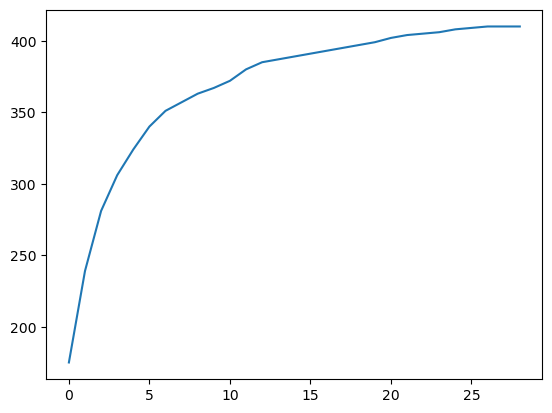

In [35]:
yello = rates[1:]
plt.plot(yello)
plt.show()

In [83]:
rates = [[0]*30,[0]*30,[0]*30,[0]*30,[0]*30]
k=[0,0,0,0,0]
for i in range(len(aa)-1):
    if(aa.Open[i+1]-aa.Close[i]>0):
        d=0
        
        if((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.02):
            d=4
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.015):
            d=3
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.01):
            d=2
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.005):
            d=1
        j=i
        k[d]+=1
        try:
            while(aa.Close[j]-aa.Close[i]>=0.0):
                try: 
                    rates[d][j-i]-=1
                    rates[d][j-i+1]+=1
                    j+=1
                except:
                    break
        except:
            pass
print(rates)

for d in range(5):
    for i in range(1,len(rates[0])-1):
        rates[d][i+1]+=rates[d][i]
    rates[d][0]=0

[[-570, 267, 68, 34, 19, 15, 6, 12, 10, 11, 7, 7, 2, 2, 5, 4, 4, 2, 0, 3, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0], [-499, 181, 68, 40, 25, 13, 9, 14, 10, 8, 6, 5, 5, 5, 4, 5, 1, 2, 2, 1, 1, 3, 0, 2, 0, 0, 2, 3, 0, 1], [-276, 89, 29, 23, 13, 7, 11, 7, 5, 4, 4, 0, 3, 1, 3, 1, 1, 2, 2, 0, 4, 0, 1, 0, 1, 2, 0, 1, 1, 0], [-170, 51, 16, 18, 10, 6, 4, 3, 1, 3, 1, 0, 2, 6, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 3, 0, 0, 0, 0], [-339, 75, 38, 21, 14, 18, 14, 12, 5, 4, 7, 8, 13, 3, 2, 3, 3, 1, 2, 1, 0, 4, 2, 1, 0, 2, 2, 0, 1, 1]]


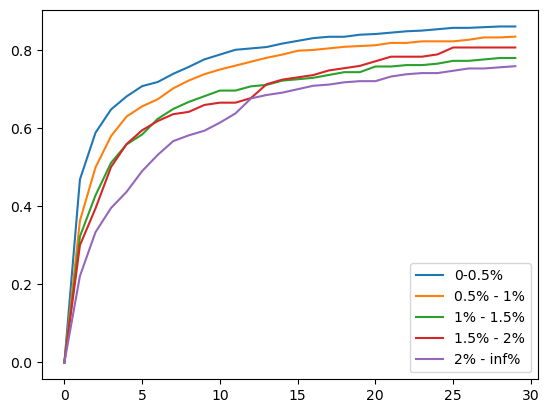

In [85]:
labels = ['0-0.5%','0.5% - 1%','1% - 1.5%','1.5% - 2%','2% - inf%']
for d in range(5):
    plt.plot(np.array(rates[d])/k[d],label=labels[d])
plt.legend()
plt.show()

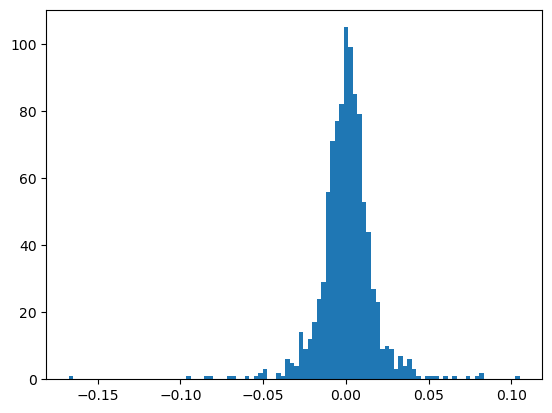

In [53]:
gaps = []

for i in range(len(aa)-1):
    gaps.append((aa.Close[i+1]-aa.Close[i]+0.000001)/aa.Close[i])
    
plt.hist(gaps,bins =100)
plt.show()

In [54]:
np.array(gaps).std()

0.017086293802312573